# TECH2 Mandatory assignment 2

## About the mandatory assignment

-   The assignment must be completed individually.
-   You are allowed to use all online resources for help, including generative AI. You must include a statement on how you used AI to solve the tasks.
-   After the assignment deadline, you must perform a peer review of two other students' assignment on Canvas. You're not allowed to use AI to write the peer-review for you.
-   Deadline for the assignment: Friday, October 17, 16:00.
-   Deadline for the peer review: Friday, October 24, 16:00.


## Requirements

-   Your solution needs to be uploaded to GitHub. You should fork the assignment repository at
    [https://github.com/richardfoltyn/TECH2-H25-assignment2](https://github.com/richardfoltyn/TECH2-H25-assignment2)
    and add your solution to this notebook.
-   All commits in your repository must be *prior* to the deadline. 
-   You need to make sure that your GitHub repository is publicly accessible. This can be changed in the GitHub repository setttings, if required.
-   You need to submit the URL to the your GitHub repository on Canvas.
-   Make sure your notebook runs without errors (`Restart` and `Run all`). 
-   Your notebook *must* run with the TECH2 environment we've been using in part 2. You can create this environment from the 
    `environment.yml` file in this repository if you haven't done so earlier.


## Tasks

In this assignment, you are asked to analyze a 10% sub-sample of the Survey of Consumer Finances (SCF), a survey of household portfolios that is representative of the US population. The survey was administered every 3 years from 1989 to 2022. The appendix in this document contains a description of the variables present in this data set (this is a subset; the original SCF contains many more variables).

1.  Data preprocessing

    1.  Read the CSV file `SCF_10pct.csv` stored in this repository.
    2.  Keep only observations where the household head is aged between 25 and 89. 
    3.  Create the column `'college'`, which contains an indicator variable that is 1 when the household head has at least some college (column `'educ'` is 3 or 4), and 0 otherwise.
    4.  Divide the values in the column `'networth'` by 1,000 so that they are reported in thousands of US dollars.
    5.  Report the number of observations in the final sample.

2.  In this part, you're asked to analyze how net worth (total gross assets minus total debt) varies across the four education levels (no high school, high school, some college, 4-year college or more):

    1.  Compute the average net worth (in thousands of US dollars) by education (use a loop).
    2.  Create a bar chart that plots the average net worth by education.

3.  In this part, you're asked to analyze how net worth has changed over the last 3 decades:

    1.  Compute the average net worth (in thousands of US dollars) by survey year (use a loop).
    2.  Create a line plot that shows the evolution of average net worth over the years 1989 to 2022.

4.  Finally, combine the analyses from the previous parts to see how net worth evolved over the years for those with and without college.

    1.  Compute the average net worth (in thousands of US dollars) by survey year, separately for non-college (`college=0`) and the college-educated (`college=1`).
    2.  Create a line plot that shows the evolution of net worth over the years 1989 to 2022 by college status, i.e., your figure should contain two lines, one for college and one for non-college.

Remember to add axis labels, titles, and legends (where applicable) to all your figures.


## Hints

-   The assignment can be solved using the concepts we covered up to and including lecture/workshop 3 on Friday, October 10. 
-   In particular, you don't need `groupby()` which we'll cover later in the course, but you can instead loop over education levels or years, as needed.

***
**WRITE YOUR SOLUTION TO PARTS 1-4 HERE**

I used AI to assist with Task 3 and 4. 
By asking how it would approach the problems, then read through the suggestions, before implementing the solutions myself.

After completing the assignment, I sent my solutions to Copilot and asked for improvements.
I then changed some of the cells, 
for example:
I initially placed the print loop inside the averaging loop in Task 4. Copilot pointed out that the loop should run only once after all the years are processed. Therefore, I moved it outside the calculation loop. 

In [1]:
# Task 1 - Data preprocessing

import pandas as pd

# Starting by reading the CSV file
# Load the CSV file into a DataFrame
df = pd.read_csv('SCF_10pct.csv')

# Display the first few rows to understand the structure and inspect the data
df.head()

,id,year,age,educ,networth
0,1,1989,35,2,0.0
1,2,1989,35,2,0.0
2,3,1989,51,2,16899.9
3,4,1989,33,2,25845.6
4,5,1989,33,2,25845.6


In [2]:
# The next step is to filter by the ages 25 to 89.

df = df[(df['age'] >= 25) & (df['age'] <= 89)]

In [3]:
# Now I am going to create the 'college' column.
# If 'educ' is 3 or 4 (some college or bachelor's+) we assign 1, otherwise we assign 0.

df['college'] = df['educ'].apply(lambda x: 1 if x in [3, 4] else 0)

In [4]:
# To make the numbers easier to read, I divide the 'networth' column by 1000.

df['networth'] = df['networth']/1000

In [5]:
# Next, report the number of observations
# Where I counted final observations, to confirm sample size

print('Number of observations in final sample', len(df))

Number of observations in final sample 5471


In [6]:

# Task 2 - Net Worth by Education
# In this part I am calculating the average net worth for each education level, and creating a bar chart.

# Create an empty dictionary to store results
avg_networth_by_educ = {} 

# Loop through education levels 1 to 4
for level in [1, 2, 3, 4]:
    # Filter rows where 'educ' equals the current level
    subset = df[df['educ'] == level]

    # Calculate the mean net worth for this group
    avg_networth = subset['networth'].mean()

    # Store the result in the dictionary 
    avg_networth_by_educ[level] = avg_networth

# Lastly, display the results
for level, avg in avg_networth_by_educ.items():
    print(f'Education level {level}: Average net worth = ${avg:.2f}k')

Education level 1: Average net worth = $154.41k
Education level 2: Average net worth = $279.35k
Education level 3: Average net worth = $1107.28k
Education level 4: Average net worth = $1677.32k


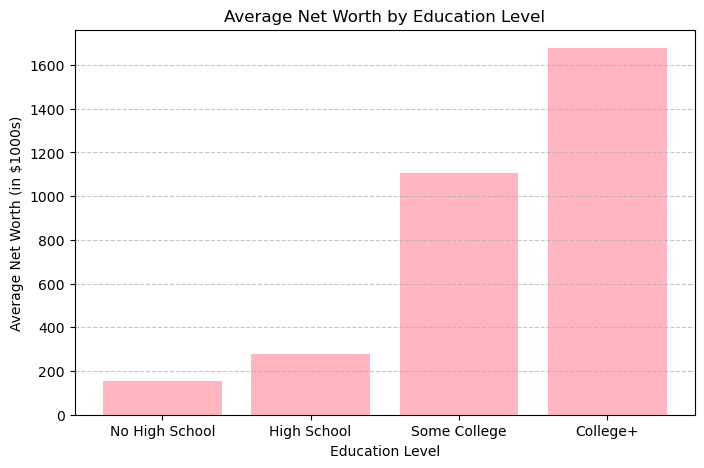

In [7]:
# Creating a Bar chart

import matplotlib.pyplot as plt

# Education level labels
labels = ['No High School', 'High School', 'Some College', 'College+']

# Extract average values in order
values = [avg_networth_by_educ[1], avg_networth_by_educ[2], avg_networth_by_educ[3], avg_networth_by_educ[4]]

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color='lightpink')

# Add labels and title
plt.xlabel('Education Level')
plt.ylabel('Average Net Worth (in $1000s)')
plt.title('Average Net Worth by Education Level')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [8]:
# Task 3 - Net Worth Over Time

# Starting with computing average net worth by year
# Create an empty dictionary to store results
avg_networth_by_year = {}

# Loop through each unique year in the dataset
for year in sorted(df['year'].unique()):
    # Filter rows for the current year
    subset = df[df['year'] == year]

    # Calculate the mean net worth
    avg_networth = subset['networth'].mean()

    # Store the result
    avg_networth_by_year[year] = avg_networth

# Display the results
for year, avg in avg_networth_by_year.items():
    print(f'Year {year}: Average net worth = ${avg:,.2f}k')


Year 1989: Average net worth = $873.86k
Year 1992: Average net worth = $384.14k
Year 1995: Average net worth = $487.89k
Year 1998: Average net worth = $911.88k
Year 2001: Average net worth = $510.17k
Year 2004: Average net worth = $725.36k
Year 2007: Average net worth = $1,471.39k
Year 2010: Average net worth = $603.62k
Year 2013: Average net worth = $915.59k
Year 2016: Average net worth = $890.47k
Year 2019: Average net worth = $734.01k
Year 2022: Average net worth = $2,458.33k


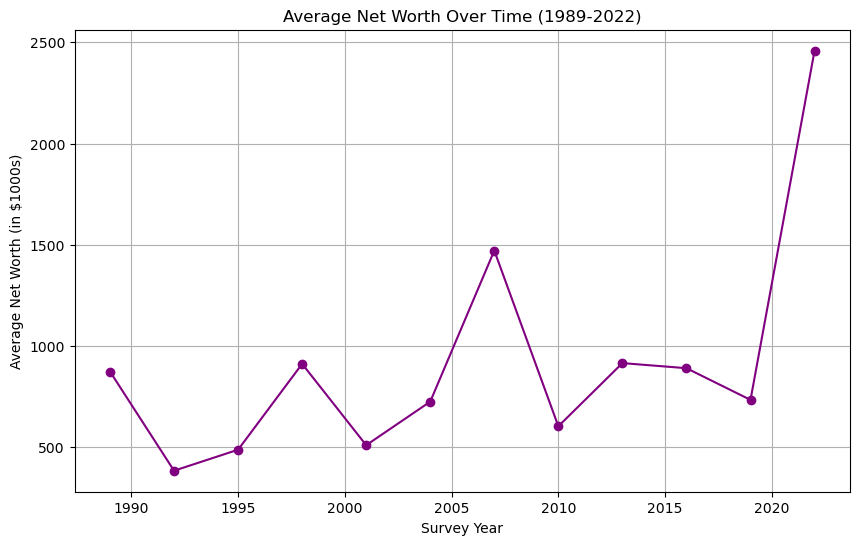

In [9]:
# Next I will visualize how net worth has changed over time

import matplotlib.pyplot as plt

# Extract years and values
years = list(avg_networth_by_year.keys())
values = list(avg_networth_by_year.values())

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(years, values, marker='o', linestyle='-', color='purple')

# Add labels and title
plt.xlabel('Survey Year')
plt.ylabel('Average Net Worth (in $1000s)')
plt.title('Average Net Worth Over Time (1989-2022)')
plt.grid(True)

# Show the plot
plt.show()

In [10]:
# Task 4 - Net Worth Over Time by College Status 
# Starting with computing average net worth by year and college status

# Create two dictionaries to store results
avg_networth_college = {}
avg_networth_noncollege = {}

# Loop through each unique year
for year in sorted(df['year'].unique()):
    # College-educated households
    college_group = df[(df['year'] == year) & (df['college'] == 1)]
    avg_college = college_group['networth'].mean()
    avg_networth_college[year] = avg_college

    # Non-college households
    noncollege_group = df[(df['year'] == year) & (df['college'] == 0)]
    avg_noncollege = noncollege_group['networth'].mean()
    avg_networth_noncollege[year] = avg_noncollege

# Display a few results for sanity check
for year in avg_networth_college:
    print(f'{year}: College = ${avg_networth_college[year]:,.2f}k, Non-college = ${avg_networth_noncollege[year]:,.2f}k')
        



1989: College = $1,727.25k, Non-college = $202.62k
1992: College = $568.61k, Non-college = $204.44k
1995: College = $711.43k, Non-college = $247.17k
1998: College = $1,426.57k, Non-college = $283.37k
2001: College = $795.65k, Non-college = $188.83k
2004: College = $1,000.03k, Non-college = $339.64k
2007: College = $2,407.75k, Non-college = $383.55k
2010: College = $880.48k, Non-college = $212.50k
2013: College = $1,463.70k, Non-college = $181.01k
2016: College = $1,233.22k, Non-college = $243.53k
2019: College = $1,072.80k, Non-college = $174.60k
2022: College = $3,567.34k, Non-college = $218.57k


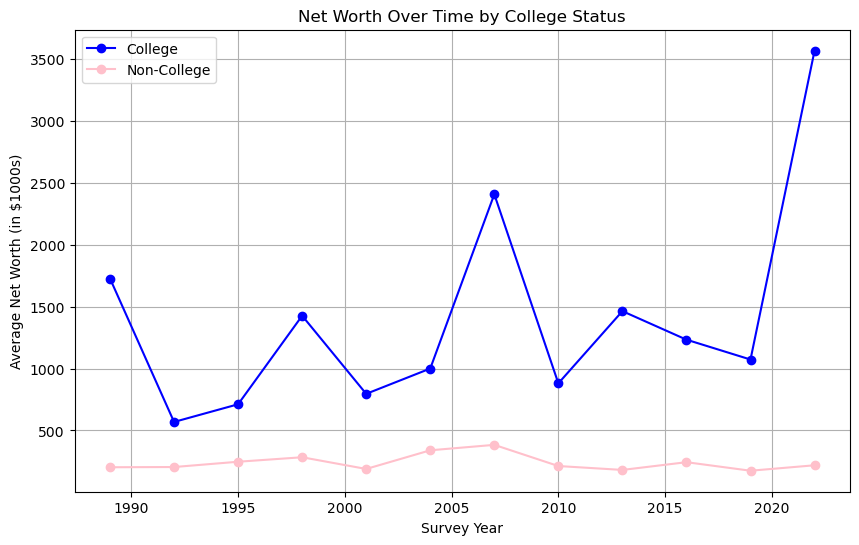

In [11]:
# Finally, I will create a line plot with two lines for visualization

import matplotlib.pyplot as plt

# Extract years
years = sorted(df['year'].unique())

# Extract values
college_values = [avg_networth_college[year] for year in years]
noncollege_values = [avg_networth_noncollege[year] for year in years]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(years, college_values, label='College', marker='o', color='blue')
plt.plot(years, noncollege_values, label='Non-College', marker='o', color='pink')

# Add labels, title and legend

plt.xlabel('Survey Year')
plt.ylabel('Average Net Worth (in $1000s)')
plt.title('Net Worth Over Time by College Status')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

***
# Data description

## Variables

| Variable         | Description |
|------------------|-------------|
| id               | Identifier  |
| year             | Survey year |
| age             | Age of reference person (household head) |
| educ            | Education of reference person (1 = no high school/GED, 2 = high school or GED, 3 = some college or Assoc. degree, 4 = Bachelors degree or higher)|
| networth        | Net worth in US dollars |

## Reference

- URL: https://www.federalreserve.gov/econres/scfindex.htm
- DOI Identifier: https://doi.org/10.17016/8799
- Creator: Board of Governors of the Federal Reserve Board
- Name: 2022 Survey of Consumer Finances
- Description:
    The Survey of Consumer Finances (SCF) is normally a triennial cross-sectional survey of U.S. families. The survey data include information on families' balance sheets, pensions, income, and demographic characteristics.
- Publisher: Board of Governors of the Federal Reserve System
- Publication Year: 2023 